## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap SVC discovery scan (paranoid)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [70]:
directory = '/home/user/notebooks/pcaps/nmap_svc_discovery_paranoid'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [72]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    329480.05943
Name: time, dtype: float64

In [73]:
duration_list = []
#print(len(merged))
for t in scan_list:
#    t['time'] = pd.to_datetime(t['time'], unit='s')
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [74]:
scan_times
#duration_list

0    329480.059430
1    329478.851737
2    329477.661896
3    329478.249257
4    329478.533244
5    329477.603756
6    329477.895505
7    329475.417270
8    329479.117053
9    329478.297980
Name: Scan times, dtype: float64

In [75]:
temp = pd.DataFrame(duration_list)

In [76]:
temp.mean()

0    329478.168713
dtype: float64

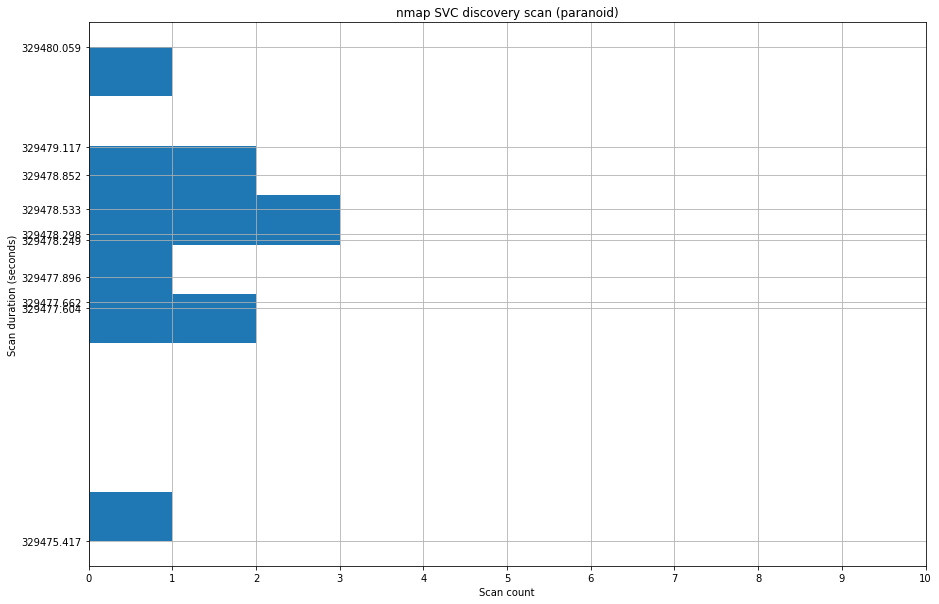

In [77]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [78]:
temp.describe()

,0
count,10.000000
mean,329478.168713
std,1.216456
min,329475.417270
25%,329477.720298
50%,329478.273619
75%,329478.772114
max,329480.059430


## Packet count

In [79]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [80]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [81]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 0.06671155204568562



## Order of ports scanned


In [82]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 64684 23
2 64684 1025
3 64684 21
4 64684 1720
5 64684 8888
6 64684 3306
7 64684 587
8 64684 199
9 64684 25
10 64684 554
11 64689 23
12 64684 111
13 64684 80
14 64684 135
15 64684 5900
16 64684 113
17 64684 445
18 64684 995
19 64684 3389
20 64684 139
21 64684 143
22 64691 23
23 64684 256
24 64684 993
25 64684 110
26 64684 22
27 64684 1723
28 64684 8080
29 64684 443
30 64684 53
31 64684 555
32 64684 6100
33 64693 23
34 64684 1218
35 64684 55056
36 64684 6005
37 64684 50002
38 64684 5901
39 64684 1935
40 64684 7911
41 64684 3005
42 64684 9
43 64684 1700
44 64695 23
45 64684 311
46 64684 17877
47 64684 5800
48 64684 19780
49 64684 5666
50 64684 1801
51 64684 119
52 64684 5061
53 64684 19801
54 64684 10566
55 64697 23
56 64684 8192
57 64684 7103
58 64684 27352
59 64684 6969
60 64684 7201
61 64684 5730
62 64684 5998
63 64684 1840
64 64684 25735
65 64684 5950
66 64699 23
67 64684 2607
68 64684 2121
69 64684 57294
70 64684 1070
71 64684 1083
72 64684 4004
73 64684 27715
74 64684 636
75 64684

1060 64684 44442
1061 64684 5915
1062 64684 42510
1063 64684 20828
1064 64684 2002
1065 64684 9011
1066 64684 1234
1067 64881 23
1068 64684 32769
1069 64684 222
1070 64684 2119
1071 64684 3659
1072 64684 2525
1073 64684 2920
1074 64684 1061
1075 64684 35500
1076 64684 30000
1077 64684 6565
1078 64883 23
1079 64684 15003
1080 64684 20031
1081 64684 1999
1082 64684 32768
1083 64684 1761
1084 64684 1075
1085 64684 2041
1086 64684 8021
1087 64684 8443
1088 64684 280
1089 64885 23
1090 64684 666
1091 64684 1087
1092 64684 7920
1093 64684 1186
1094 64684 1046
1095 64684 9415
1096 64684 49155
1097 64684 1152
1098 64684 3809
1099 64684 10629
1 64763 587
2 64763 113
3 64763 8080
4 64763 25
5 64763 5900
6 64763 53
7 64763 3389
8 64763 135
9 64763 139
10 64763 256
11 64768 587
12 64763 1025
13 64763 22
14 64763 80
15 64763 143
16 64763 1720
17 64763 554
18 64763 110
19 64763 3306
20 64763 995
21 64763 445
22 64770 587
23 64763 443
24 64763 993
25 64763 23
26 64763 8888
27 64763 111
28 64763 199
2

973 64763 10628
974 64763 5952
975 64763 880
976 64763 5357
977 64763 9111
978 64763 11111
979 64944 587
980 64763 44443
981 64763 3017
982 64763 1009
983 64763 13783
984 64763 20005
985 64763 5825
986 64763 7496
987 64763 1087
988 64763 3322
989 64763 1104
990 64946 587
991 64763 9485
992 64763 8600
993 64763 100
994 64763 5030
995 64763 2100
996 64763 57797
997 64763 2382
998 64763 1839
999 64763 32779
1000 64763 20221
1001 64948 587
1002 64763 3905
1003 64763 15003
1004 64763 1
1005 64763 5555
1006 64763 5544
1007 64763 2170
1008 64763 49158
1009 64763 2605
1010 64763 9101
1011 64763 5989
1012 64950 587
1013 64763 7019
1014 64763 9594
1015 64763 3801
1016 64763 1102
1017 64763 49153
1018 64763 17877
1019 64763 2399
1020 64763 19315
1021 64763 49167
1022 64763 3372
1023 64952 587
1024 64763 2717
1025 64763 464
1026 64763 1417
1027 64763 1055
1028 64763 24444
1029 64763 89
1030 64763 3221
1031 64763 19350
1032 64763 3659
1033 64763 1007
1034 64954 587
1035 64763 49154
1036 64763 1700


975 49633 8011
976 49633 9081
977 49633 22939
978 49633 1099
979 49814 554
980 49633 49400
981 49633 1
982 49633 1093
983 49633 4321
984 49633 1062
985 49633 1033
986 49633 545
987 49633 4899
988 49633 5815
989 49633 179
990 49816 554
991 49633 9010
992 49633 7025
993 49633 1277
994 49633 83
995 49633 2190
996 49633 1039
997 49633 1782
998 49633 2038
999 49633 20005
1000 49633 2492
1001 49818 554
1002 49633 6792
1003 49633 2161
1004 49633 541
1005 49633 6567
1006 49633 1234
1007 49633 58080
1008 49633 31337
1009 49633 50800
1010 49633 1042
1011 49633 9535
1012 49820 554
1013 49633 2607
1014 49633 1044
1015 49633 55055
1016 49633 3889
1017 49633 2100
1018 49633 32772
1019 49633 49159
1020 49633 44442
1021 49633 2013
1022 49633 34572
1023 49822 554
1024 49633 6789
1025 49633 90
1026 49633 636
1027 49633 1169
1028 49633 7070
1029 49633 6901
1030 49633 9090
1031 49633 8443
1032 49633 5903
1033 49633 8093
1034 49824 554
1035 49633 524
1036 49633 17877
1037 49633 1029
1038 49633 1077
1039 49

881 55054 5906
882 55054 6389
883 55054 49159
884 55054 5432
885 55054 6543
886 55054 8254
887 55054 8031
888 55054 1521
889 55054 1147
890 55054 2105
891 55219 110
892 55054 30718
893 55054 1043
894 55054 1914
895 55054 8010
896 55054 50001
897 55054 7627
898 55054 84
899 55054 2909
900 55054 2251
901 55054 4004
902 55221 110
903 55054 999
904 55054 8291
905 55054 9200
906 55054 34573
907 55054 1839
908 55054 1443
909 55054 1533
910 55054 1352
911 55054 2604
912 55054 10024
913 55223 110
914 55054 1972
915 55054 1287
916 55054 9917
917 55054 9090
918 55054 7741
919 55054 2008
920 55054 1100
921 55054 720
922 55054 2107
923 55054 259
924 55225 110
925 55054 79
926 55054 2040
927 55054 19350
928 55054 65389
929 55054 2222
930 55054 1097
931 55054 3918
932 55054 1984
933 55054 37
934 55054 1149
935 55227 110
936 55054 5004
937 55054 32775
938 55054 1164
939 55054 6547
940 55054 5009
941 55054 1009
942 55054 49176
943 55054 1600
944 55054 458
945 55054 1091
946 55229 110
947 55054 1812
94

966 48859 3030
967 48859 9101
968 49038 80
969 48859 9943
970 48859 1839
971 48859 15660
972 48859 1126
973 48859 787
974 48859 49167
975 48859 52673
976 48859 9593
977 48859 3920
978 48859 31337
979 49040 80
980 48859 687
981 48859 9418
982 48859 513
983 48859 2382
984 48859 2107
985 48859 8001
986 48859 16993
987 48859 41511
988 48859 1107
989 48859 2030
990 49042 80
991 48859 32783
992 48859 2022
993 48859 64623
994 48859 9010
995 48859 1461
996 48859 1060
997 48859 1166
998 48859 1199
999 48859 1152
1000 48859 18040
1001 49044 80
1002 48859 2196
1003 48859 1076
1004 48859 4321
1005 48859 2910
1006 48859 2401
1007 48859 1075
1008 48859 1149
1009 48859 808
1010 48859 212
1011 48859 406
1012 49046 80
1013 48859 9535
1014 48859 5730
1015 48859 20031
1016 48859 6668
1017 48859 6789
1018 48859 13783
1019 48859 10616
1020 48859 100
1021 48859 3659
1022 48859 9002
1023 49048 80
1024 48859 32772
1025 48859 1974
1026 48859 4006
1027 48859 1090
1028 48859 3370
1029 48859 40193
1030 48859 9220

1064 48596 9999
1065 48596 20222
1066 48596 1130
1067 48793 3306
1068 48596 1063
1069 48596 5566
1070 48596 2179
1071 48596 2020
1072 48596 1248
1073 48596 50800
1074 48596 32778
1075 48596 3546
1076 48596 31337
1077 48596 44176
1078 48795 3306
1079 48596 1417
1080 48596 1081
1081 48596 13782
1082 48596 32782
1083 48596 61900
1084 48596 15742
1085 48596 2046
1086 48596 1998
1087 48596 3659
1088 48596 1030
1089 48797 3306
1090 48596 34571
1091 48596 1175
1092 48596 1086
1093 48596 54045
1094 48596 5003
1095 48596 40911
1096 48596 2710
1097 48596 1031
1098 48596 1055
1099 48596 1141
1 35094 554
2 35094 995
3 35094 3306
4 35094 53
5 35094 25
6 35094 111
7 35094 8080
8 35094 199
9 35094 1720
10 35094 445
11 35099 554
12 35094 1025
13 35094 993
14 35094 23
15 35094 587
16 35094 135
17 35094 1723
18 35094 139
19 35094 22
20 35094 21
21 35094 256
22 35101 554
23 35094 3389
24 35094 5900
25 35094 143
26 35094 443
27 35094 113
28 35094 110
29 35094 8888
30 35094 80
31 35094 5633
32 35094 5050
3

604 35094 5877
605 35207 554
606 35094 5051
607 35094 5906
608 35094 3077
609 35094 2557
610 35094 2702
611 35094 42510
612 35094 1183
613 35094 6580
614 35094 17877
615 35094 3945
616 35209 554
617 35094 10621
618 35094 7625
619 35094 464
620 35094 8994
621 35094 8292
622 35094 1717
623 35094 2035
624 35094 1080
625 35094 3006
626 35094 9917
627 35211 554
628 35094 7778
629 35094 7777
630 35094 50800
631 35094 6646
632 35094 8045
633 35094 7200
634 35094 1052
635 35094 8010
636 35094 125
637 35094 15000
638 35213 554
639 35094 24
640 35094 55056
641 35094 9503
642 35094 63331
643 35094 8084
644 35094 49156
645 35094 16080
646 35094 280
647 35094 2008
648 35094 10082
649 35215 554
650 35094 1094
651 35094 1113
652 35094 2605
653 35094 19315
654 35094 3871
655 35094 2000
656 35094 648
657 35094 1038
658 35094 8899
659 35094 6543
660 35217 554
661 35094 406
662 35094 9502
663 35094 5225
664 35094 49176
665 35094 9999
666 35094 19101
667 35094 4
668 35094 1186
669 35094 9666
670 35094 749

698 42279 1010
699 42279 2602
700 42279 16016
701 42279 880
702 42279 2005
703 42279 2557
704 42410 993
705 42279 1106
706 42279 3301
707 42279 2811
708 42279 119
709 42279 1687
710 42279 1594
711 42279 5414
712 42279 9917
713 42279 801
714 42279 1007
715 42412 993
716 42279 2022
717 42279 1301
718 42279 481
719 42279 898
720 42279 3517
721 42279 6689
722 42279 1163
723 42279 1296
724 42279 3221
725 42279 1164
726 42414 993
727 42279 6881
728 42279 3005
729 42279 4111
730 42279 1309
731 42279 1947
732 42279 1123
733 42279 7002
734 42279 4224
735 42279 1104
736 42279 3211
737 42416 993
738 42279 1108
739 42279 1148
740 42279 20828
741 42279 726
742 42279 24
743 42279 808
744 42279 34571
745 42279 10003
746 42279 4002
747 42279 9290
748 42418 993
749 42279 6566
750 42279 49161
751 42279 1217
752 42279 19780
753 42279 54045
754 42279 1098
755 42279 7001
756 42279 1524
757 42279 513
758 42279 2126
759 42420 993
760 42279 765
761 42279 6007
762 42279 7496
763 42279 1700
764 42279 9877
765 4

685 42398 2522
686 42398 1259
687 42398 1461
688 42398 514
689 42398 9666
690 42398 1070
691 42398 3826
692 42398 1152
693 42527 587
694 42398 2046
695 42398 5631
696 42398 5950
697 42398 999
698 42398 902
699 42398 49161
700 42398 3878
701 42398 3283
702 42398 5500
703 42398 5009
704 42529 587
705 42398 8011
706 42398 9080
707 42398 2260
708 42398 2602
709 42398 14442
710 42398 10004
711 42398 6565
712 42398 2042
713 42398 3005
714 42398 2968
715 42531 587
716 42398 1000
717 42398 32769
718 42398 497
719 42398 2038
720 42398 3301
721 42398 10628
722 42398 1503
723 42398 5050
724 42398 1001
725 42398 1218
726 42533 587
727 42398 55555
728 42398 259
729 42398 30951
730 42398 90
731 42398 9010
732 42398 5963
733 42398 6112
734 42398 222
735 42398 9101
736 42398 714
737 42535 587
738 42398 17988
739 42398 2119
740 42398 5902
741 42398 50500
742 42398 16993
743 42398 1022
744 42398 212
745 42398 1141
746 42398 6566
747 42398 1062
748 42537 587
749 42398 2725
750 42398 366
751 42398 6006
75

167 54192 6009
168 54192 1801
169 54192 3801
170 54192 2111
171 54192 616
172 54192 25734
173 54192 2604
174 54192 1079
175 54192 5002
176 54227 143
177 54192 3659
178 54192 7201
179 54192 1556
180 54192 18988
181 54192 14238
182 54192 179
183 54192 6788
184 54192 5904
185 54192 255
186 54192 163
187 54229 143
188 54192 6667
189 54192 1100
190 54192 5030
191 54192 3784
192 54192 5633
193 54192 3828
194 54192 2065
195 54192 259
196 54192 683
197 54192 12265
198 54231 143
199 54192 3001
200 54192 2135
201 54192 6006
202 54192 5221
203 54192 1875
204 54192 5998
205 54192 2046
206 54192 3920
207 54192 801
208 54192 8192
209 54233 143
210 54192 16012
211 54192 646
212 54192 1082
213 54192 8084
214 54192 50300
215 54192 1037
216 54192 60443
217 54192 5566
218 54192 7019
219 54192 3371
220 54235 143
221 54192 3071
222 54192 34572
223 54192 10617
224 54192 11111
225 54192 458
226 54192 12000
227 54192 2009
228 54192 11110
229 54192 1533
230 54192 9876
231 54237 143
232 54192 3517
233 54192 489

833 54192 5859
834 54192 1805
835 54192 1455
836 54347 143
837 54192 2119
838 54192 5679
839 54192 6565
840 54192 9944
841 54192 4006
842 54192 7402
843 54192 3889
844 54192 49154
845 54192 8022
846 54192 4900
847 54349 143
848 54192 3476
849 54192 2043
850 54192 8100
851 54192 3809
852 54192 4567
853 54192 1862
854 54192 8087
855 54192 4279
856 54192 9998
857 54192 10616
858 54351 143
859 54192 7627
860 54192 2160
861 54192 8600
862 54192 9040
863 54192 49400
864 54192 85
865 54192 593
866 54192 6059
867 54192 389
868 54192 5431
869 54353 143
870 54192 6129
871 54192 1021
872 54192 54045
873 54192 545
874 54192 1719
875 54192 5907
876 54192 41511
877 54192 9
878 54192 3031
879 54192 2702
880 54355 143
881 54192 254
882 54192 13722
883 54192 8300
884 54192 106
885 54192 2605
886 54192 10001
887 54192 4126
888 54192 6901
889 54192 6666
890 54192 2500
891 54357 143
892 54192 48080
893 54192 981
894 54192 1112
895 54192 1687
896 54192 1137
897 54192 8081
898 54192 50500
899 54192 1062
900

In [83]:
orders_port

,scannr,sport,dport
0,1,64684,23
1,2,64684,1025
2,3,64684,21
3,4,64684,1720
4,5,64684,8888
...,...,...,...
10985,1095,54192,1175
10986,1096,54192,3000
10987,1097,54192,32769
10988,1098,54192,4550


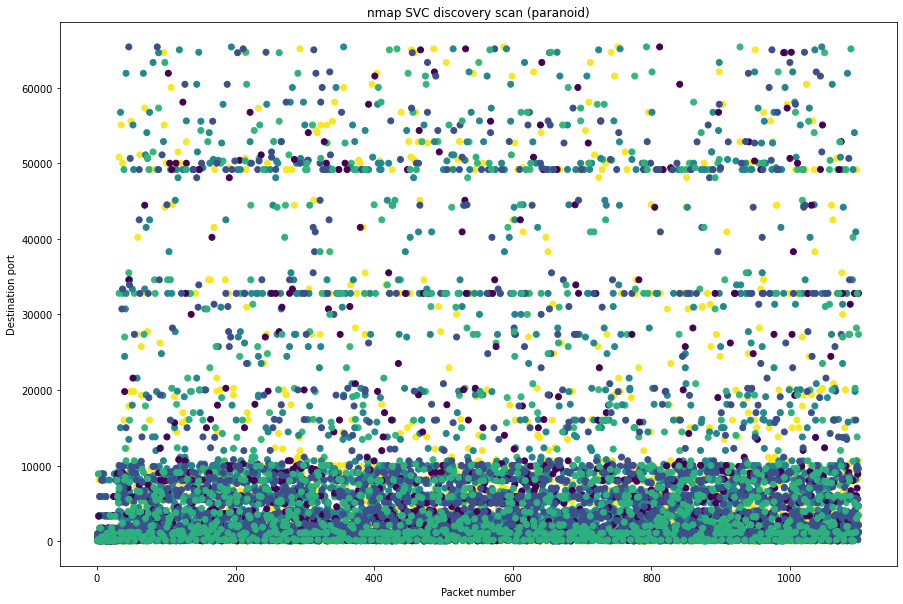

In [84]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [85]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [86]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

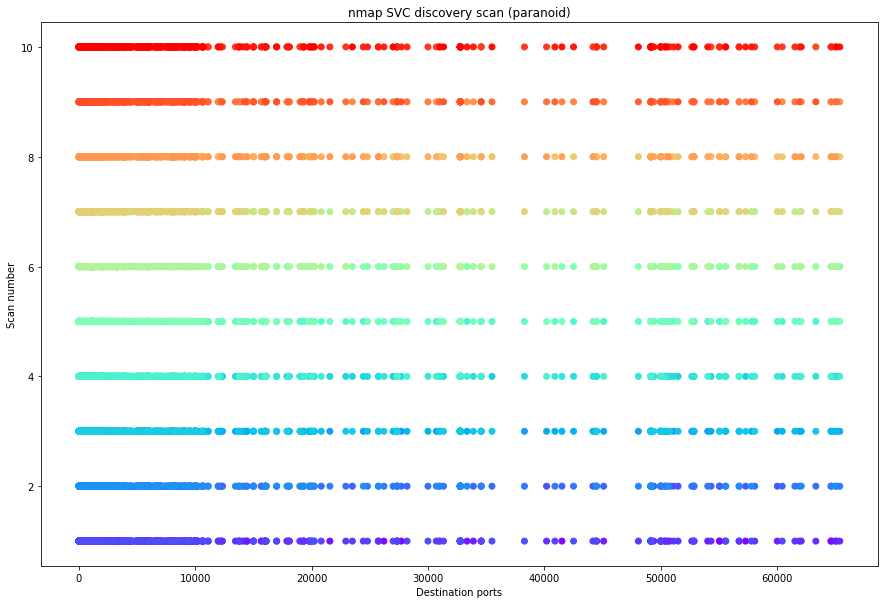

In [87]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [88]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

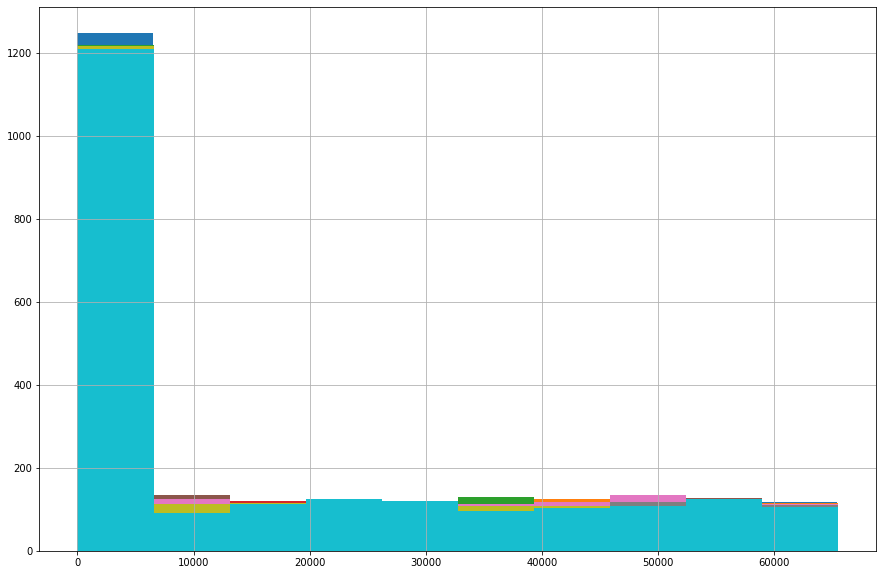

In [92]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

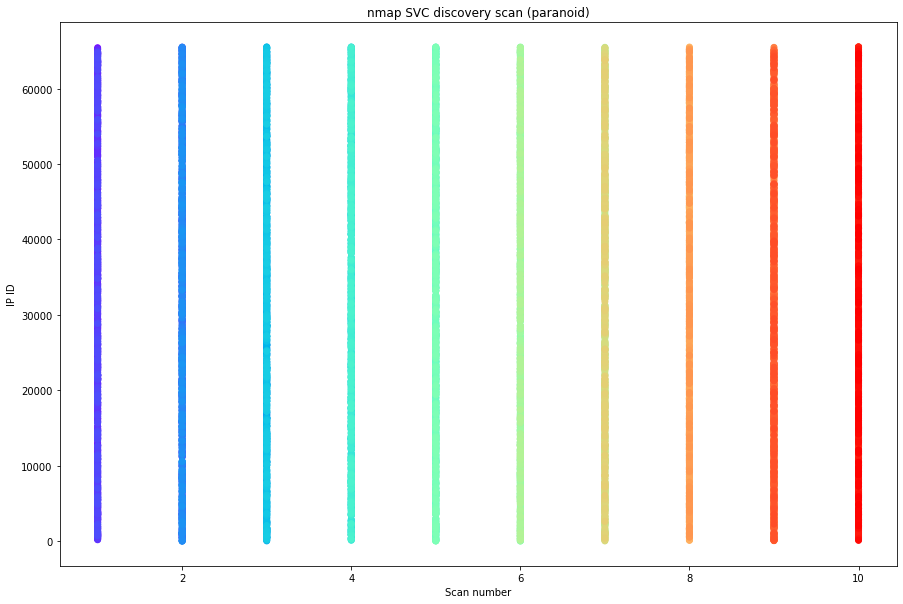

In [93]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


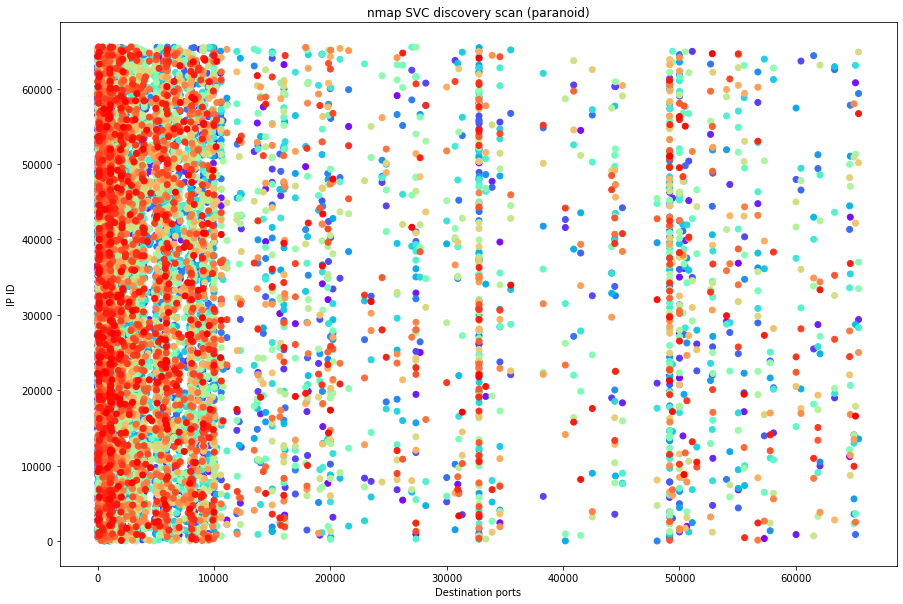

In [94]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

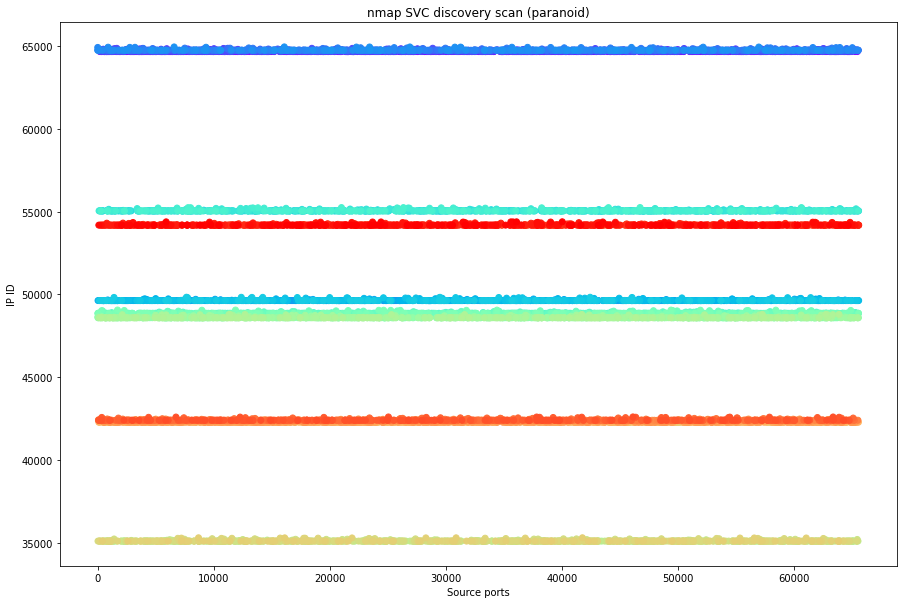

In [104]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [96]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [97]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [98]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040252234
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040383304
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1041038662
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 104

Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1047067938
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1047199008
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1047854398
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 104

Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1053621638
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
Sequence number: 1040579919
-----
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510015489
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence numbe

Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2512768095
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2512637017
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2512505947
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 251

Sequence number: 2502675633
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2502544563
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2502413501
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2510212100
Sequence number: 2502282431
Sequence number: 2510212100
Sequence number: 251

Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3532362265
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3532231195
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3532624413
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 353

Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3529609971
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3530003189
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3529872119
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 3535966800
Sequence number: 353

Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929053497
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929446711
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929315637
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 292

Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2922631071
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2922499997
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2922893211
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 2929905422
Sequence number: 292

Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3454514613
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3454383543
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3454776761
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 345

Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3451762159
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3443766545
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3443635475
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 3452089744
Sequence number: 345

Sequence number: 3644864633
Sequence number: 3645978728
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3646109802
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3646240876
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3646371950
Sequence number: 364

Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3643619348
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3643750422
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3643881480
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 364

Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3649517758
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3649648816
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
Sequence number: 3644864633
-----
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence numbe

Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3301053350
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3301184416
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3301315490
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 329

Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3291222856
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3291353930
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3290436420
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 3298366461
Sequence number: 329

Sequence number: 1487822996
Sequence number: 1491689683
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1491558621
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1491427551
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1491296473
Sequence number: 148

Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1477271607
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1477140529
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1477009459
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 1487822996
Sequence number: 148

Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071114679
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1070983605
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071376827
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 107

Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1064560915
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1064429841
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1064823063
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 1071835522
Sequence number: 107

Sequence number: 4087229064
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4087097994
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4083296884
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4083165814
Sequence number: 4091751157
Sequence number: 409

Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
Sequence number: 4091751157
-----


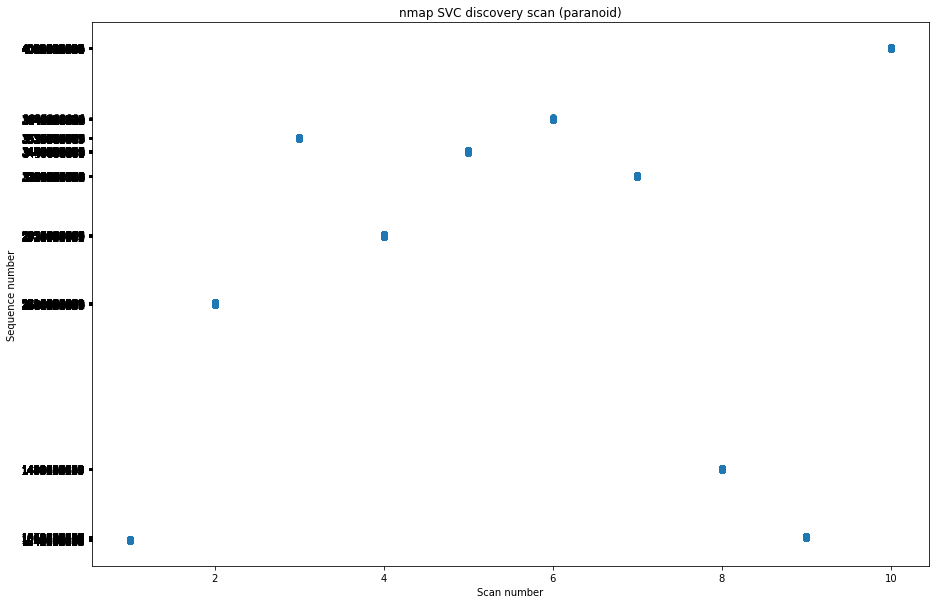

In [99]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


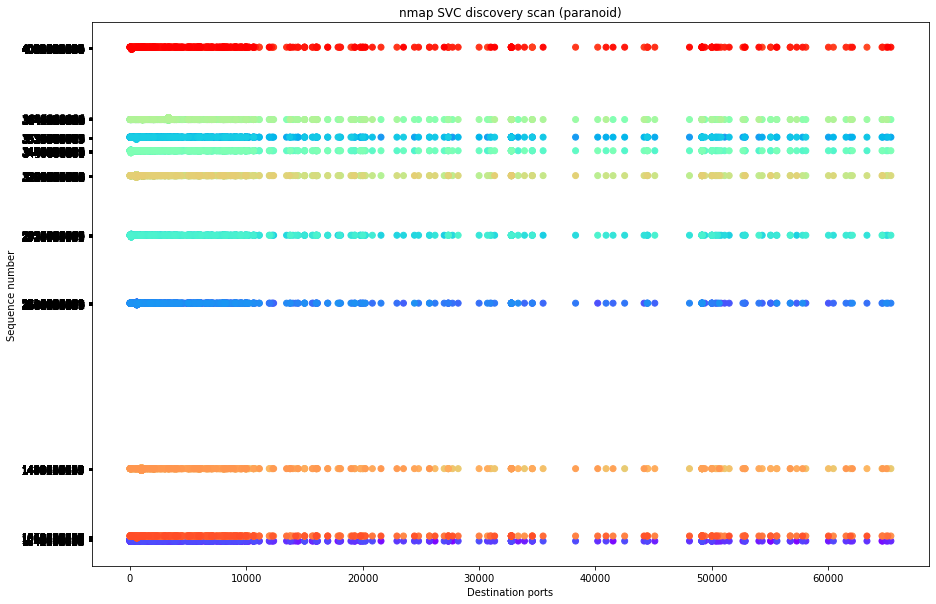

In [100]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

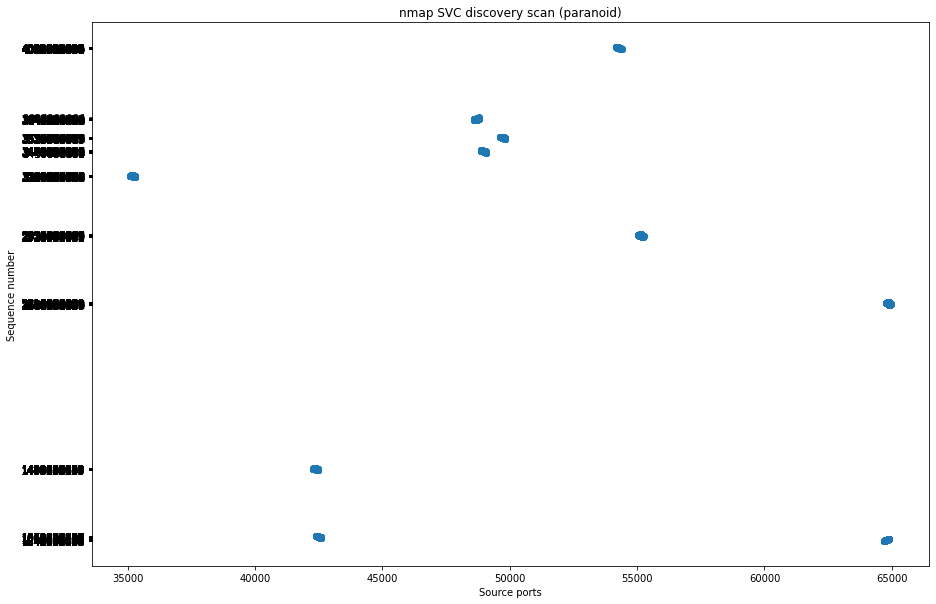

In [101]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [103]:
len(set(orders_port['sport']))

998

In [107]:
orders_port['sport'].value_counts()[:30]

64763    1001
42398    1001
64684    1000
54192    1000
42279    1000
35094    1000
48859    1000
55054    1000
49633    1000
48596    1000
64707       1
35217       1
35221       1
35223       1
35225       1
35227       1
35229       1
35231       1
35233       1
35235       1
35237       1
35239       1
35241       1
35243       1
35245       1
35247       1
35249       1
35251       1
35253       1
35255       1
Name: sport, dtype: int64

## Flags

In [102]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F